In [10]:
# 패키지 참조

import sys
from pandas import DataFrame, read_excel, pivot_table, melt, merge
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
 

In [2]:
# 그래프 초기화
plt.rcParams['font.family']='AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.unicode_minus']=False

문제1
수명에 대해 기술통계량을 구하고 상자그림을 그려라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

In [3]:
# 기술통계량, 상자그림, 분석

In [4]:
# 데이터 불러오기
origin = read_excel('C:/Users/Jihwan/01Class/D.탐색적데이터분석/D.DataAnalysis/수업data/연구과제데이터/kings_life.xlsx')
origin

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Jihwan/01Class/D.탐색적데이터분석/D.DataAnalysis/수업data/연구과제데이터/kings_life.xlsx'

In [ ]:
origin.describe()

,수명
count,27.000000
mean,46.037037
std,16.173296
min,16.000000
25%,33.000000
50%,45.000000
75%,56.000000
max,82.000000


In [ ]:
origin.dtypes

왕     object
수명     int64
dtype: object

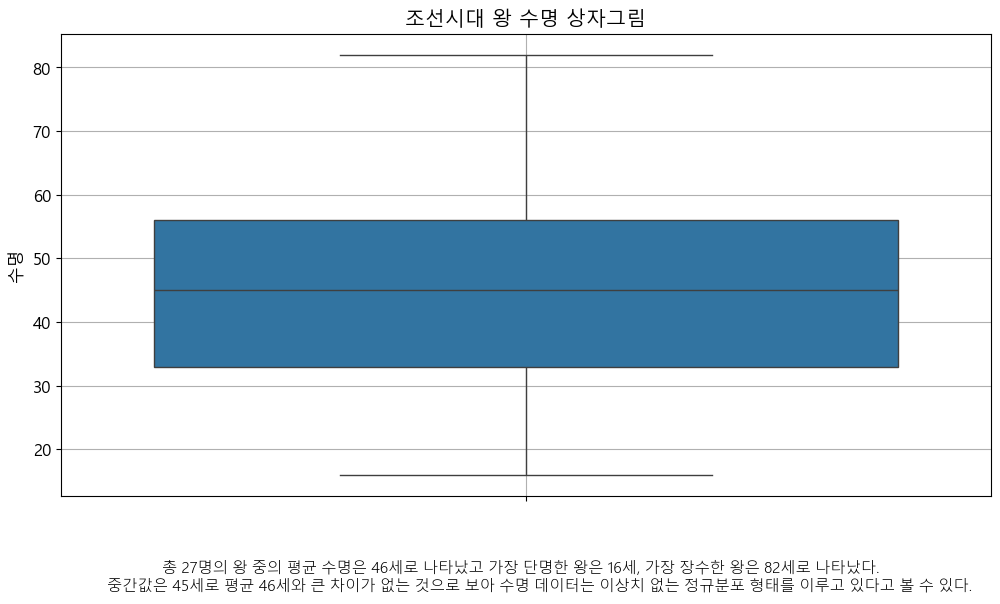

In [ ]:
plt.figure()
sns.boxplot(data=origin['수명'])
plt.grid()
plt.title('조선시대 왕 수명 상자그림')
txt = """총 27명의 왕 중의 평균 수명은 46세로 나타났고 가장 단명한 왕은 16세, 가장 장수한 왕은 82세로 나타났다. 
        중간값은 45세로 평균 46세와 큰 차이가 없는 것으로 보아 수명 데이터는 이상치 없는 정규분포 형태를 이루고 있다고 볼 수 있다."""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 11, "weight": "light"})
plt.show()
plt.close()

문제2
- 외국기업(F)과 내국기업(K)별로 기술통계량을 상자그림을 그려서 비교/분석하라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

In [ ]:
# 기업별 분류 후 기술통계량, 상자그림, 분석

In [7]:
# 데이터 불러오기
stock = read_excel('C:/Users/J/Desktop/Data_Science/Class/D.탐색적데이터분석/수업data/연구과제데이터/stock.xlsx')
stock

,구분,주가
0,F,120
1,K,165
2,K,147
3,F,144
4,K,135
5,K,161
6,K,102
7,K,165
8,K,170
9,F,147


In [9]:
# 데이터 전처리
#df = stock.query('구분 == "K"')
df = stock[stock['구분'] == "K"]
df2 = stock.query('구분 == "F"')
df

,구분,주가
1,K,165
2,K,147
4,K,135
5,K,161
6,K,102
7,K,165
8,K,170
15,K,173
19,K,173
21,K,145


In [ ]:
# 데이터 기술통계량
df.describe()
#df.info()

,주가
count,12.000000
mean,150.833333
std,21.425700
min,102.000000
25%,142.500000
50%,154.000000
75%,166.250000
max,173.000000


In [ ]:
df2.describe()
#df2.info()

,주가
count,12.000000
mean,155.166667
std,27.764704
min,120.000000
25%,142.750000
50%,150.000000
75%,158.000000
max,235.000000


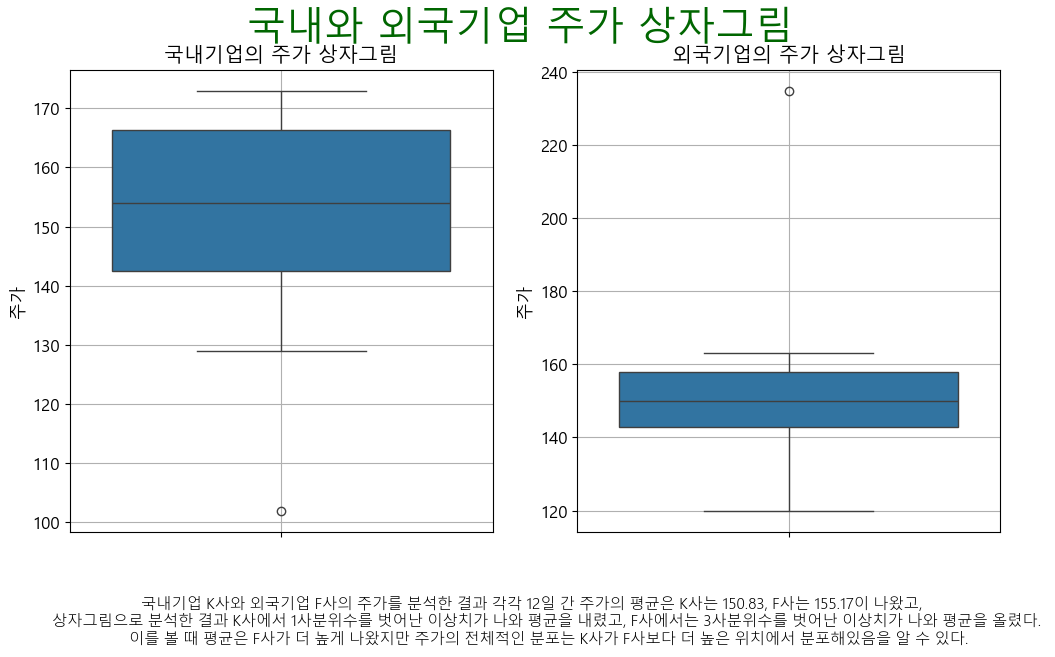

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.suptitle('국내와 외국기업 주가 상자그림', fontsize=28, color='#006600')
sns.boxplot(data=df['주가'],ax=ax1)
ax1.grid()
ax1.set_title('국내기업의 주가 상자그림')

sns.boxplot(data=df2['주가'],ax=ax2)
ax2.grid()
ax2.set_title('외국기업의 주가 상자그림')

txt = """국내기업 K사와 외국기업 F사의 주가를 분석한 결과 각각 12일 간 주가의 평균은 K사는 150.83, F사는 155.17이 나왔고,
        상자그림으로 분석한 결과 K사에서 1사분위수를 벗어난 이상치가 나와 평균을 내렸고, F사에서는 3사분위수를 벗어난 이상치가 나와 평균을 올렸다. 
        이를 볼 때 평균은 F사가 더 높게 나왔지만 주가의 전체적인 분포는 K사가 F사보다 더 높은 위치에서 분포해있음을 알 수 있다."""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 11, "weight": "light"})
plt.show()
plt.close()

문제3
- 포도농장에서 수집한 비료 종류에 따른 수확량 자료이다. 기술통계량을 구하고 상자그림을 그려라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

In [ ]:
# 비료종류(A,B) 분류 후 기술통계량, 상자그림, 분석

In [13]:
grape = read_excel('C:/Users/J/Desktop/Data_Science/Class/D.탐색적데이터분석/수업data/연구과제데이터/grape.xlsx')
grape

,비료종류,수확량
0,A,39.3
1,B,11.4
2,A,26.6
3,A,23.7
4,B,25.8
5,A,28.5
6,A,24.2
7,A,17.9
8,B,16.5
9,B,21.1


In [14]:
# 데이터 전처리 
g_df = grape.query('비료종류 == "A"')
g_df2 = grape.query('비료종류 == "B"')


In [16]:
merge(g_df.describe(),
      g_df2.describe(),
      left_index=True, right_index=True).T.rename(index={'수확량_x':'A', '수확량_y':'B'})

,count,mean,std,min,25%,50%,75%,max
A,7.0,26.357143,6.578211,17.9,23.950,24.3,27.550,39.3
B,4.0,18.700000,6.172520,11.4,15.225,18.8,22.275,25.8


In [ ]:
g_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   비료종류    7 non-null      object 
 1   수확량     7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 168.0+ bytes


In [ ]:
g_df.describe()

,수확량
count,7.000000
mean,26.357143
std,6.578211
min,17.900000
25%,23.950000
50%,24.300000
75%,27.550000
max,39.300000


In [ ]:
g_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 1 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   비료종류    4 non-null      object 
 1   수확량     4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 96.0+ bytes


In [ ]:
g_df2.describe()

,수확량
count,4.00000
mean,18.70000
std,6.17252
min,11.40000
25%,15.22500
50%,18.80000
75%,22.27500
max,25.80000


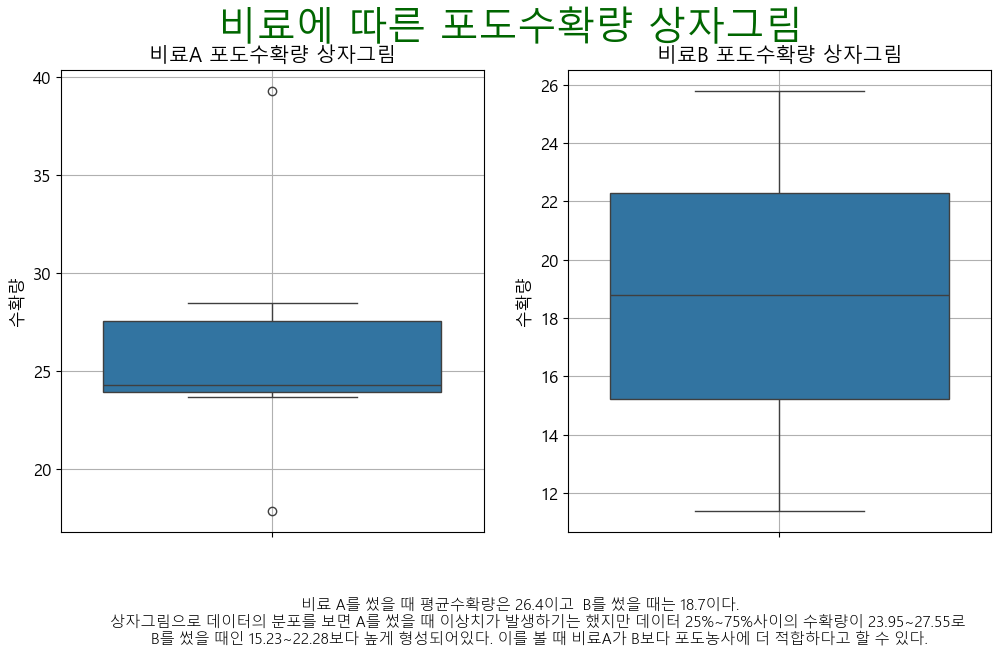

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.suptitle('비료에 따른 포도수확량 상자그림', fontsize=28, color='#006600')
sns.boxplot(data=g_df['수확량'],ax=ax1)
ax1.grid()
ax1.set_title('비료A 포도수확량 상자그림')

sns.boxplot(data=g_df2['수확량'],ax=ax2)
ax2.grid()
ax2.set_title('비료B 포도수확량 상자그림')

txt = """비료 A를 썼을 때 평균수확량은 26.4이고  B를 썼을 때는 18.7이다. 
        상자그림으로 데이터의 분포를 보면 A를 썼을 때 이상치가 발생하기는 했지만 데이터 25%~75%사이의 수확량이 23.95~27.55로 
        B를 썼을 때인 15.23~22.28보다 높게 형성되어있다. 이를 볼 때 비료A가 B보다 포도농사에 더 적합하다고 할 수 있다."""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 11, "weight": "light"})
plt.show()
plt.close()

문제4
다음은 통계학개론을 수강하는 두 학과(A, C)의 성적분포 데이터의 일부이다. 이 두 그룹을 비교하기 위한 기술통계량을 구하고 상자그림을 그려서 비교/분석하라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

In [ ]:
# 학과(A,C) 분류 후 기술통계량, 상자그림, 분석

In [17]:
# 데이터 불러오기

grade = read_excel('C:/Users/J/Desktop/Data_Science/Class/D.탐색적데이터분석/수업data/연구과제데이터/analysis_grade.xlsx')
grade

,학과,점수
0,C,54
1,A,52
2,A,37
3,C,41
4,A,67
5,C,43
6,A,73
7,C,51
8,C,55
9,A,15


In [22]:
# 데이터 전처리

st_df = grade.query('학과 == "A"')
st_df2 = grade.query('학과 == "C"')

In [23]:
st_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1 to 31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   학과      20 non-null     object
 1   점수      20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 480.0+ bytes


In [24]:
st_df.describe()

,점수
count,20.000000
mean,43.750000
std,20.229928
min,10.000000
25%,29.500000
50%,42.500000
75%,55.000000
max,78.000000


In [25]:
st_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 0 to 27
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   학과      12 non-null     object
 1   점수      12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


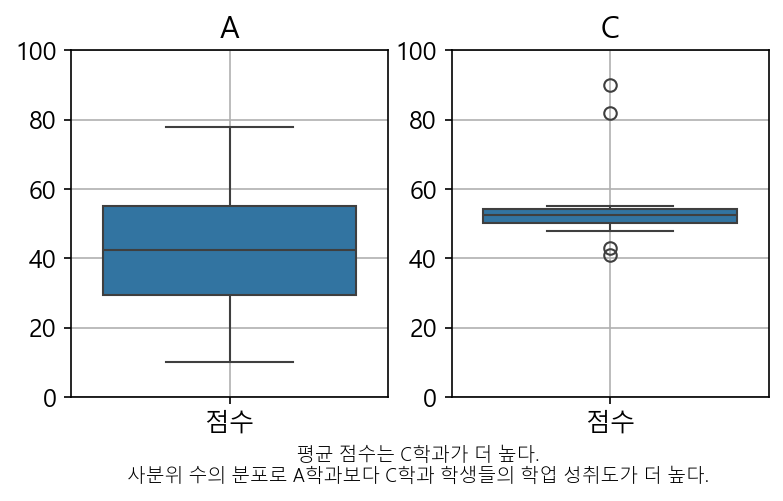

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(6,3),dpi=150)
sns.boxplot(data=st_df,ax=ax1)
sns.boxplot(data=st_df2,ax=ax2)

ax1.set_title('A')
ax1.grid()
ax1.set_ylim([0,100])

ax2.set_title('C')
ax2.grid()
ax2.set_ylim([0,100])

txt = """평균 점수는 C학과가 더 높다.
사분위 수의 분포로 A학과보다 C학과 학생들의 학업 성취도가 더 높다."""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 9, "weight": "light"})

plt.show()
plt.close()

문제5
다음은 통계학 전공(STAT) 학생과 전산학 전공(COMP) 학생의 통계학 과목에 대한 중간고사 성적과 기말시험 성적을 나타낸 표이다.

(1) 전공에서 STAT를 1로, COMP를 2로 변환한 레이블을 적용하라.

(2) 중간고사 및 기말고사 성적에 대한 각종 기술통계량을 구하고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

(3) 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

(4) 전공별로 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, (3)번의 결과와 비교 하라.

In [ ]:
st_co_grade = read_excel('C:/Users/Jihwan/01Class/D.탐색적데이터분석/D.DataAnalysis/수업data/연구과제데이터/stat_comp_grade.xlsx')
st_co_grade

,전공,중간고사,기말고사
0,STAT,34,86
1,STAT,50,77
2,STAT,75,74
3,COMP,76,96
4,COMP,61,78
5,COMP,65,40
6,COMP,31,68
7,STAT,47,57
8,STAT,94,82
9,COMP,49,57


In [ ]:
# 데이터 전처리
# (1) 전공에서 STAT를 1로, COMP를 2로 변환한 레이블을 적용하라.
# map함수 사용하여 데이터 변환

st_co_grade['전공'] = st_co_grade['전공'].map({'STAT': 1, 'COMP': 2})
st_co_grade


,전공,중간고사,기말고사
0,1,34,86
1,1,50,77
2,1,75,74
3,2,76,96
4,2,61,78
5,2,65,40
6,2,31,68
7,1,47,57
8,1,94,82
9,2,49,57


In [ ]:
# (2) 중간고사 및 기말고사 성적에 대한 각종 기술통계량을 구하고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.
# 중간고사, 기말고사 분류 후 기술통계량, 분석

st_mid_df = st_co_grade[['전공','중간고사']]
st_final_df = st_co_grade[['전공','기말고사']]



In [ ]:
st_mid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   전공      20 non-null     int64
 1   중간고사    20 non-null     int64
dtypes: int64(2)
memory usage: 452.0 bytes


In [ ]:
st_mid_df.describe()

,전공,중간고사
count,20.000000,20.000000
mean,1.400000,65.150000
std,0.502625,19.647619
min,1.000000,31.000000
25%,1.000000,48.500000
50%,1.000000,67.500000
75%,2.000000,78.500000
max,2.000000,94.000000


In [ ]:
st_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   전공      20 non-null     int64
 1   기말고사    20 non-null     int64
dtypes: int64(2)
memory usage: 452.0 bytes


In [ ]:
st_final_df.describe()

,전공,기말고사
count,20.000000,20.000000
mean,1.400000,75.650000
std,0.502625,15.597824
min,1.000000,40.000000
25%,1.000000,66.000000
50%,1.000000,79.000000
75%,2.000000,85.250000
max,2.000000,96.000000


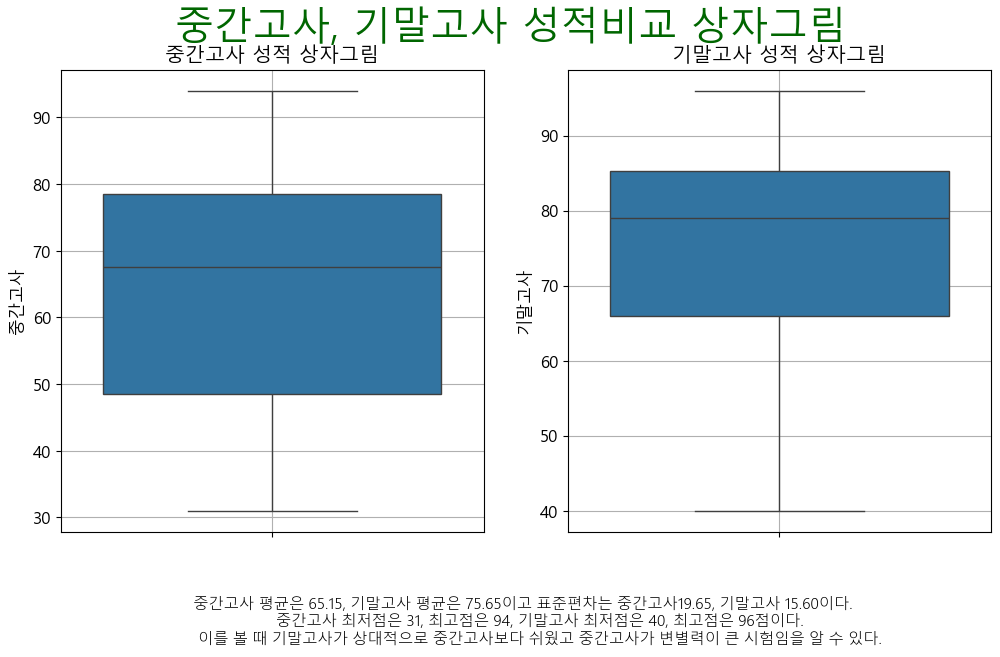

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.suptitle('중간고사, 기말고사 성적비교 상자그림', fontsize=28, color='#006600')
sns.boxplot(data=st_mid_df['중간고사'],ax=ax1)
ax1.grid()
ax1.set_title('중간고사 성적 상자그림')

sns.boxplot(data=st_final_df['기말고사'],ax=ax2)
ax2.grid()
ax2.set_title('기말고사 성적 상자그림')

txt = """ 중간고사 평균은 65.15, 기말고사 평균은 75.65이고 표준편차는 중간고사19.65, 기말고사 15.60이다. 
        중간고사 최저점은 31, 최고점은 94, 기말고사 최저점은 40, 최고점은 96점이다.
        이를 볼 때 기말고사가 상대적으로 중간고사보다 쉬웠고 중간고사가 변별력이 큰 시험임을 알 수 있다."""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 11, "weight": "light"})
plt.show()
plt.close()

In [ ]:
# (3) 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.
# 성적 히스토그램, 분석

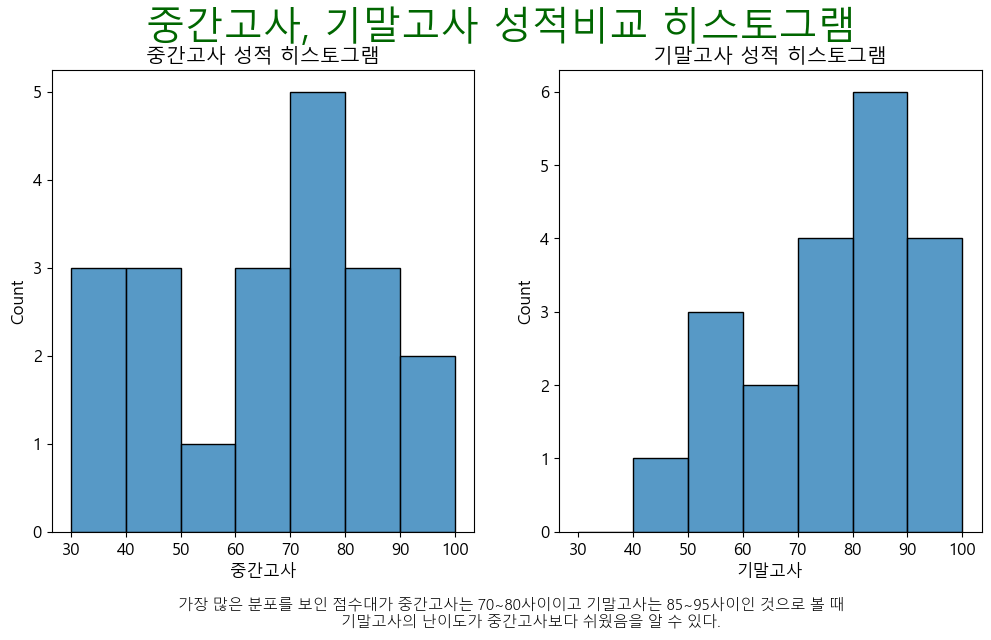

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.suptitle('중간고사, 기말고사 성적비교 히스토그램', fontsize=28, color='#006600')
sns.histplot(data=st_mid_df,x='중간고사',bins=[30,40,50,60,70,80,90,100],ax=ax1)

ax1.set_title('중간고사 성적 히스토그램')

sns.histplot(data=st_final_df, x='기말고사',bins=[30,40,50,60,70,80,90,100],ax=ax2)

ax2.set_title('기말고사 성적 히스토그램')

txt = """가장 많은 분포를 보인 점수대가 중간고사는 70~80사이이고 기말고사는 85~95사이인 것으로 볼 때 
        기말고사의 난이도가 중간고사보다 쉬웠음을 알 수 있다."""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 11, "weight": "light"})
plt.show()
plt.close()

In [ ]:
# (4) 전공별로 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, (3)번의 결과와 비교 하라.
# 전공별 성적 히스토그램, 3번과 비교분석 

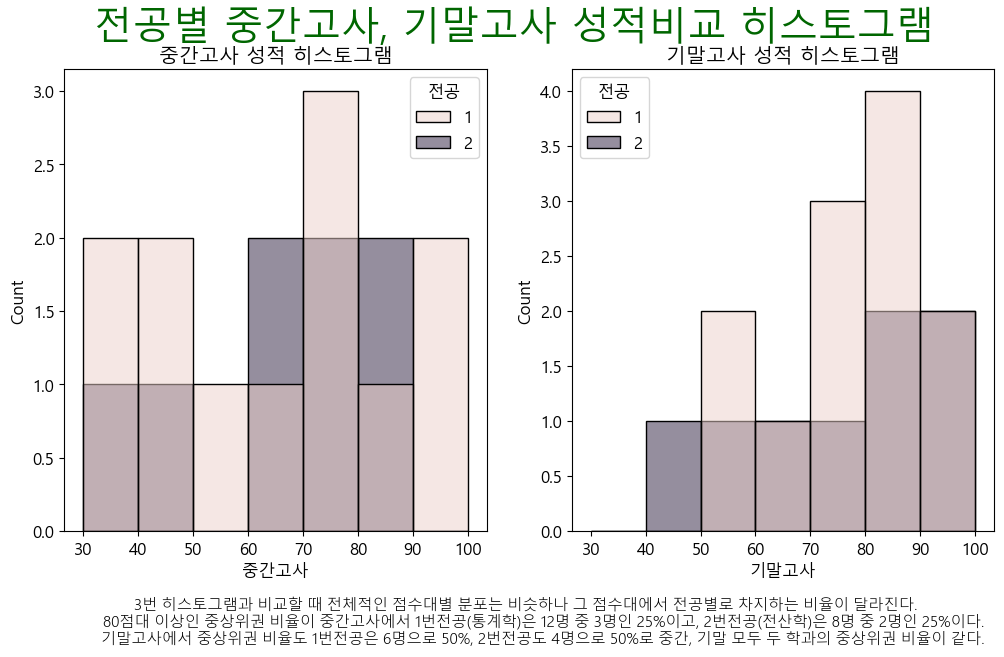

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.suptitle('전공별 중간고사, 기말고사 성적비교 히스토그램', fontsize=28, color='#006600')
sns.histplot(data=st_mid_df,x='중간고사',bins=[30,40,50,60,70,80,90,100],ax=ax1,hue='전공')

ax1.set_title('중간고사 성적 히스토그램')

sns.histplot(data=st_final_df, x='기말고사',bins=[30,40,50,60,70,80,90,100],ax=ax2, hue='전공')

ax2.set_title('기말고사 성적 히스토그램')

txt = """3번 히스토그램과 비교할 때 전체적인 점수대별 분포는 비슷하나 그 점수대에서 전공별로 차지하는 비율이 달라진다.
        80점대 이상인 중상위권 비율이 중간고사에서 1번전공(통계학)은 12명 중 3명인 25%이고, 2번전공(전산학)은 8명 중 2명인 25%이다.
        기말고사에서 중상위권 비율도 1번전공은 6명으로 50%, 2번전공도 4명으로 50%로 중간, 기말 모두 두 학과의 중상위권 비율이 같다."""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 11, "weight": "light"})
plt.show()
plt.close()

문제6
Wage 데이터 셋은 경제 및 노동 시장에 관련된 정보를 담고 있는 데이터셋이다.
이 데이터셋은 미국에서 수집된 임금에 대한 정보를 포함하고 있다.

(1) 데이터를 로드하여 명목형 변수를 1, 2 등으로 레이블링 하시오. 값의 종류는 데이터프레임으로부터 조회하여 확인하시오.

(2) 레이블링 된 명목형 변수를 category 타입으로 변경하시오.

(3) 수치형 변수에 대한 요약 통계를 확인하고 설명하시오 (상자그림 제외)

(4) 명목형 변수에 대한 기술 통계를 수행하고 설명하시오.

(5) 결혼 여부에 따른 임금 수준을 비교하고자 한다. 결혼 여부에 따라 서브플롯을 구성하여 임금 수준을 히스토그램으로 시각화 하고 설명하시오.

(6) 교육 수준에 따른 임금에 대한 히스토그램을 시각화 하고 설명하시오. 교육수준별로 그래프를 나누어 서브플롯으로 제시해야 합니다.

(7) 직군별 건강상태를 확인하고자 한다. 적절한 형태로 데이터를 재배치하고 설명하시오.

(8) 교육 수준을 인종 비율에 따라 설명하고자 한다. 적절한 시각화 자료를 제시하고 설명하시오.

In [ ]:
wage = read_excel('C:/Users/Jihwan/01Class/D.탐색적데이터분석/D.DataAnalysis/수업data/연구과제데이터/wage.xlsx')
wage

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [ ]:
# (1) 데이터를 로드하여 명목형 변수를 1, 2 등으로 레이블링 하시오. 값의 종류는 데이터프레임으로부터 조회하여 확인하시오.
# 명목형 변수 레이블링(1,2등)

In [ ]:
wage.dtypes

year            int64
age             int64
maritl         object
race           object
education      object
region         object
jobclass       object
health         object
health_ins     object
logwage       float64
wage          float64
dtype: object

In [ ]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   logwage     3000 non-null   float64
 10  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 257.9+ KB


In [ ]:
#wage['maritl'] = wage['maritl'].map({'1. Never Married':1,'2. Married':2,'3. Widowed':3,'4. Divorced':4,'5. Separated':5})
#wage['race'] = wage['race'].map({'1. White':1,'2. Black':2,'3. Asian':3,'4. Other':4})
#wage['education'] = wage['education'].map({'1. < HS Grad':1,'2. HS Grad':2,'3. Some College':3,'4. College Grad':4,'5. Advanced Degree':5})
#wage['region'] = wage['region'].map({'2. Middle Atlantic':2})
#wage['jobclass'] = wage['jobclass'].map({'1. Industrial':1,'2. Information':2})
#wage['health'] = wage['health'].map({'1. <=Good':1,'2. >=Very Good':2})
#wage['health_ins'] = wage['health_ins'].map({'1. Yes':1,'2. No':2})
w_df = wage.copy()
w_df


,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1,1,1,2,1,1,2,4.318063,75.043154
1,2004,24,1,1,4,2,2,2,2,4.255273,70.476020
2,2003,45,2,1,3,2,1,1,1,4.875061,130.982177
3,2003,43,2,3,4,2,2,2,1,5.041393,154.685293
4,2005,50,4,1,2,2,2,1,1,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2,1,3,2,1,2,1,5.041393,154.685293
2996,2007,30,2,1,2,2,1,2,2,4.602060,99.689464
2997,2005,27,2,2,1,2,1,1,2,4.193125,66.229408
2998,2005,27,1,1,3,2,1,2,1,4.477121,87.981033


In [ ]:
# (2) 레이블링 된 명목형 변수를 category 타입으로 변경하시오.
# categorytype 변경
w_df2 = w_df.astype({'maritl':'category','race':'category','education':'category','region':'category','jobclass':'category','health':'category','health_ins':'category'})
w_df2.dtypes

year             int64
age              int64
maritl        category
race          category
education     category
region        category
jobclass      category
health        category
health_ins    category
logwage        float64
wage           float64
dtype: object

In [ ]:
# (3) 수치형 변수에 대한 요약 통계를 확인하고 설명하시오 (상자그림 제외)
# 요약통계 확인 및 설명

w_df2.describe()

# 수집된 데이터에서 나이의 평균은 42.4세이고 18세부터 80세까지 있다. 
# 임금의 평균은 111.7이고 최소는 20.1, 최대는 318.3 표준편차는 41.7이다. 중위값은 104.9로 평균보다 조금 낮다.

,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,4.653905,111.703608
std,2.026167,11.542406,0.351753,41.728595
min,2003.000000,18.000000,3.000000,20.085537
25%,2004.000000,33.750000,4.447158,85.383940
50%,2006.000000,42.000000,4.653213,104.921507
75%,2008.000000,51.000000,4.857332,128.680488
max,2009.000000,80.000000,5.763128,318.342430


In [ ]:
# (4) 명목형 변수에 대한 기술 통계를 수행하고 설명하시오.
w_df3 = w_df2[['age','maritl','wage']].groupby('maritl').mean()
w_df3


C:\Users\Jihwan\AppData\Local\Temp\ipykernel_14000\3110555308.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  w_df3 = w_df2[['age','maritl','wage']].groupby('maritl').mean()


,age,wage
maritl,,
1,32.583333,92.734649
2,44.861620,118.860261
3,50.789474,99.538655
4,47.607843,103.159261
5,43.818182,101.215787


In [ ]:
w_df4 = w_df2[['age','race','wage']].groupby('race').describe()
w_df4

C:\Users\Jihwan\AppData\Local\Temp\ipykernel_14000\4023316367.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  w_df4 = w_df2[['age','race','wage']].groupby('race').describe()


age                                                         wage  \
       count       mean        std   min    25%   50%   75%   max   count   
race                                                                        
1     2480.0  42.394758  11.365655  18.0  34.00  42.0  51.0  80.0  2480.0   
2      293.0  43.563140  13.012913  18.0  33.00  44.0  52.0  75.0   293.0   
3      190.0  41.821053  11.218823  22.0  32.25  40.0  50.0  76.0   190.0   
4       37.0  37.702703  11.553895  21.0  28.00  39.0  47.0  65.0    37.0   

                                                                           \
            mean        std        min        25%         50%         75%   
race                                                                        
1     112.563666  41.733830  20.085537  86.695155  106.348256  130.042934   
2     101.601177  37.162486  23.274704  81.283253   94.072715  117.146817   
3     120.288288  46.422514  34.607418  87.981033  115.375039  144.828129   
4      89.973326  29.153530  38.223583  71.319639   81.283253  104.921507   

                  
             max  
race              
1     314.329336  
2     318.342430  
3     299.262977  
4     169.528538

In [ ]:
w_df5 = w_df2[['age','education','wage']].groupby('education').describe()
w_df5

C:\Users\Jihwan\AppData\Local\Temp\ipykernel_14000\2044176191.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  w_df5 = w_df2[['age','education','wage']].groupby('education').describe()


age                                                        wage  \
           count       mean        std   min   25%   50%    75%   max  count   
education                                                                      
1          268.0  41.794776  12.611111  18.0  33.0  41.5  50.25  75.0  268.0   
2          971.0  42.217302  12.023480  18.0  33.0  42.0  50.00  80.0  971.0   
3          650.0  40.887692  11.523327  18.0  32.0  40.0  49.00  80.0  650.0   
4          685.0  42.773723  10.902406  22.0  34.0  43.0  51.00  76.0  685.0   
5          426.0  45.007042  10.263468  25.0  38.0  44.0  53.00  76.0  426.0   

                                                                     \
                 mean        std        min         25%         50%   
education                                                             
1           84.104415  21.578051  20.934378   70.261774   81.283253   
2           95.783351  28.567560  23.274704   77.946382   94.072715   
3          107.755566  32.474725  20.085537   89.242885  104.921507   
4          124.427908  41.189071  32.366413   99.689464  118.884359   
5          150.917776  53.904206  38.605915  117.146817  141.775172   

                                   
                  75%         max  
education                          
1           97.493294  152.216807  
2          109.833986  318.342430  
3          121.388422  314.329336  
4          143.134941  281.745971  
5          171.497631  318.342430

In [ ]:
w_df6 = w_df2[['age','jobclass','wage']].groupby('jobclass').describe()
w_df6

C:\Users\Jihwan\AppData\Local\Temp\ipykernel_14000\4133113455.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  w_df6 = w_df2[['age','jobclass','wage']].groupby('jobclass').describe()


age                                                        wage  \
           count       mean        std   min   25%   50%   75%   max   count   
jobclass                                                                       
1         1544.0  41.398316  11.691543  18.0  32.0  41.0  50.0  80.0  1544.0   
2         1456.0  43.492445  11.286519  18.0  35.0  43.0  51.0  80.0  1456.0   

                                                                               \
                mean        std        min        25%         50%         75%   
jobclass                                                                        
1         103.321129  35.110674  22.962401  81.283253   99.689464  118.884359   
2         120.592721  46.131439  20.085537  91.699226  112.648896  137.590143   

                     
                max  
jobclass             
1         295.99125  
2         318.34243

In [ ]:
w_df7 = w_df2[['age','health','wage']].groupby('health').describe()
w_df7

C:\Users\Jihwan\AppData\Local\Temp\ipykernel_14000\148954771.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  w_df7 = w_df2[['age','health','wage']].groupby('health').describe()


age                                                         wage  \
         count       mean        std   min    25%   50%   75%   max   count   
health                                                                        
1        858.0  44.947552  12.227837  18.0  36.25  45.0  54.0  80.0   858.0   
2       2142.0  41.400093  11.098054  18.0  33.00  41.0  49.0  80.0  2142.0   

                                                                             \
              mean        std        min        25%         50%         75%   
health                                                                        
1       101.661285  35.184998  20.085537  79.854900   98.599344  118.884359   
2       115.726164  43.438963  20.934378  87.981033  109.833986  134.705375   

                    
               max  
health              
1       311.934569  
2       318.342430

In [ ]:
w_df8 = w_df2[['age','health_ins','wage']].groupby('health_ins').describe()
w_df8

C:\Users\Jihwan\AppData\Local\Temp\ipykernel_14000\1935561471.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  w_df8 = w_df2[['age','health_ins','wage']].groupby('health_ins').describe()


age                                                      \
             count       mean        std   min   25%   50%   75%   max   
health_ins                                                               
1           2083.0  43.506481  10.907406  18.0  35.0  43.0  51.0  80.0   
2            917.0  39.934569  12.526220  18.0  30.0  39.0  49.0  80.0   

              wage                                                           \
             count        mean        std        min        25%         50%   
health_ins                                                                    
1           2083.0  120.238314  41.236983  32.366413  94.072715  112.648896   
2            917.0   92.316703  35.971903  20.085537  70.513416   87.981033   

                                    
                   75%         max  
health_ins                          
1           136.157711  318.342430  
2           107.903924  309.571771

In [ ]:
w_df2

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1,1,1,2,1,1,2,4.318063,75.043154
1,2004,24,1,1,4,2,2,2,2,4.255273,70.476020
2,2003,45,2,1,3,2,1,1,1,4.875061,130.982177
3,2003,43,2,3,4,2,2,2,1,5.041393,154.685293
4,2005,50,4,1,2,2,2,1,1,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2,1,3,2,1,2,1,5.041393,154.685293
2996,2007,30,2,1,2,2,1,2,2,4.602060,99.689464
2997,2005,27,2,2,1,2,1,1,2,4.193125,66.229408
2998,2005,27,1,1,3,2,1,2,1,4.477121,87.981033


In [ ]:
m1_df = w_df2[['maritl','wage']].query('maritl==1')
m2_df = w_df2[['maritl','wage']].query('maritl==2')
m3_df = w_df2[['maritl','wage']].query('maritl==3')
m4_df = w_df2[['maritl','wage']].query('maritl==4')
m5_df = w_df2[['maritl','wage']].query('maritl==5')


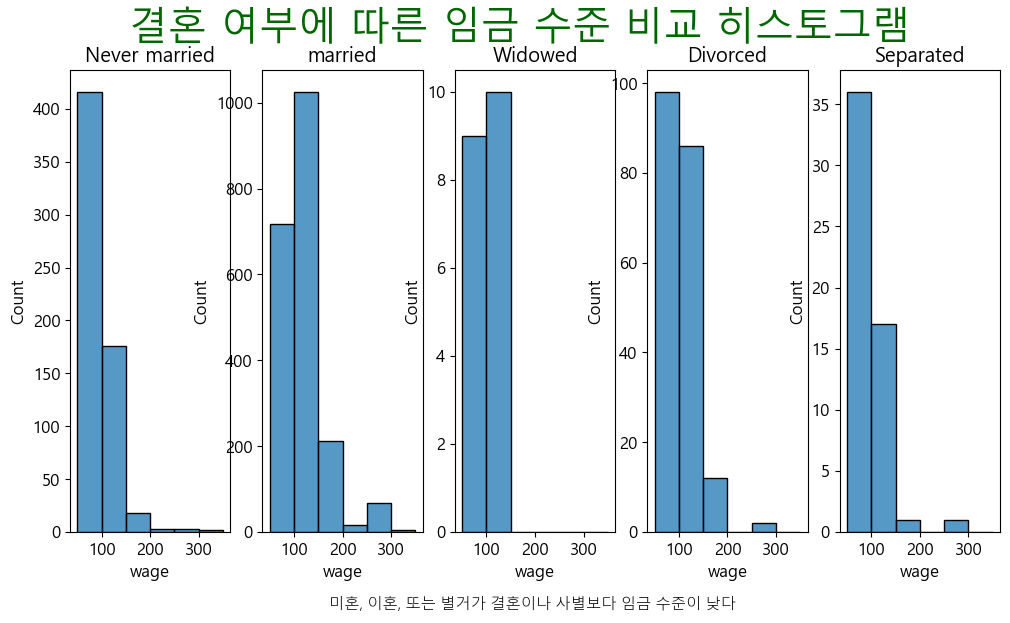

In [ ]:
# (5) 결혼 여부에 따른 임금 수준을 비교하고자 한다. 결혼 여부에 따라 서브플롯을 구성하여 임금 수준을 히스토그램으로 시각화 하고 설명하시오.
fig,(ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,5)


fig.suptitle('결혼 여부에 따른 임금 수준 비교 히스토그램', fontsize=28, color='#006600')
sns.histplot(data=m1_df,x='wage',bins=[50,100,150,200,250,300,350],ax=ax3)

ax3.set_title('Never married')
ax4.set_title('married')
ax5.set_title('Widowed')
ax6.set_title('Divorced')
ax7.set_title('Separated')

sns.histplot(data=m2_df, x='wage',bins=[50,100,150,200,250,300,350],ax=ax4)
sns.histplot(data=m3_df, x='wage',bins=[50,100,150,200,250,300,350],ax=ax5)
sns.histplot(data=m4_df, x='wage',bins=[50,100,150,200,250,300,350],ax=ax6)
sns.histplot(data=m5_df, x='wage',bins=[50,100,150,200,250,300,350],ax=ax7)

# ax2.set_title('기말고사 성적 히스토그램')

txt = """미혼, 이혼, 또는 별거가 결혼이나 사별보다 임금 수준이 낮다"""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 11, "weight": "light"})
plt.show()
plt.close()


In [ ]:
e1_df = w_df2[['education','wage']].query('education==1')
e2_df = w_df2[['education','wage']].query('education==2')
e3_df = w_df2[['education','wage']].query('education==3')
e4_df = w_df2[['education','wage']].query('education==4')
e5_df = w_df2[['education','wage']].query('education==5')


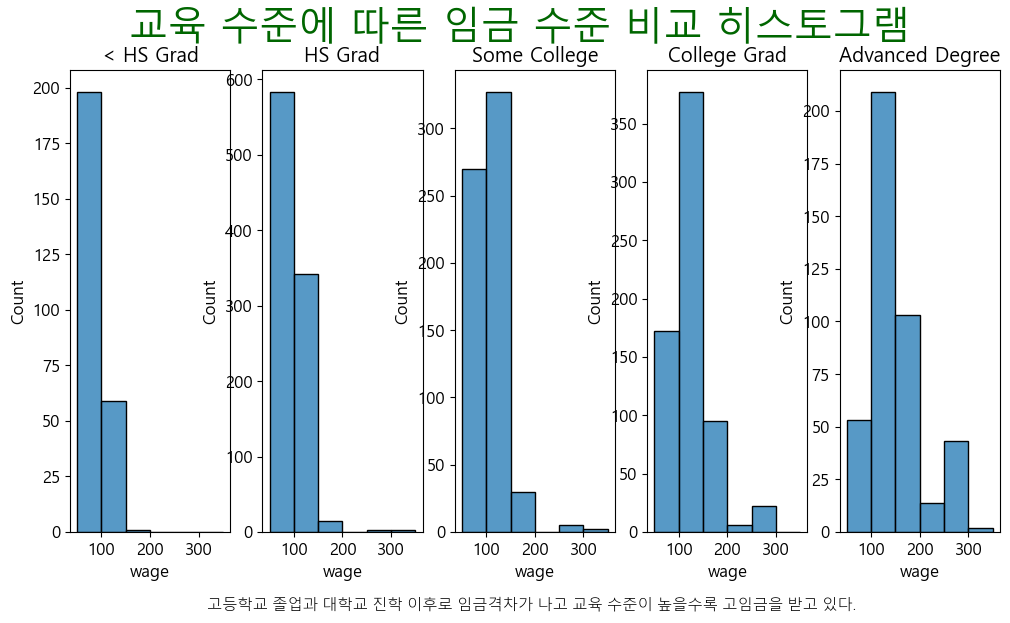

In [ ]:
# (6) 교육 수준에 따른 임금에 대한 히스토그램을 시각화 하고 설명하시오. 교육수준별로 그래프를 나누어 서브플롯으로 제시해야 합니다.
fig,(aax1,aax2,aax3,aax4,aax5) = plt.subplots(1,5)


fig.suptitle('교육 수준에 따른 임금 수준 비교 히스토그램', fontsize=28, color='#006600')
sns.histplot(data=e1_df,x='wage',bins=[50,100,150,200,250,300,350],ax=aax1)

aax1.set_title('< HS Grad')
aax2.set_title('HS Grad')
aax3.set_title('Some College')
aax4.set_title('College Grad')
aax5.set_title('Advanced Degree')

sns.histplot(data=e2_df, x='wage',bins=[50,100,150,200,250,300,350],ax=aax2)
sns.histplot(data=e3_df, x='wage',bins=[50,100,150,200,250,300,350],ax=aax3)
sns.histplot(data=e4_df, x='wage',bins=[50,100,150,200,250,300,350],ax=aax4)
sns.histplot(data=e5_df, x='wage',bins=[50,100,150,200,250,300,350],ax=aax5)


txt = """고등학교 졸업과 대학교 진학 이후로 임금격차가 나고 교육 수준이 높을수록 고임금을 받고 있다."""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 11, "weight": "light"})
plt.show()
plt.close()



In [ ]:
# (7) 직군별 건강상태를 확인하고자 한다. 적절한 형태로 데이터를 재배치하고 설명하시오.
w_df2
w_df9 = w_df2[['jobclass','health','age']].groupby(['jobclass','health']).count()
w_df10 = w_df9.rename(columns={'age':'인원'})
w_df10

C:\Users\Jihwan\AppData\Local\Temp\ipykernel_14000\1201366562.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  w_df9 = w_df2[['jobclass','health','age']].groupby(['jobclass','health']).count()


인원
jobclass health      
1        1        487
         2       1057
2        1        371
         2       1085

In [ ]:
# (8) 교육 수준을 인종 비율에 따라 설명하고자 한다. 적절한 시각화 자료를 제시하고 설명하시오.

In [ ]:
ddf = w_df2[['race','education','age']]
ddf2 = ddf.groupby(['education','race']).count()
ddf3 = ddf2.rename(columns={'age':'인원수'})
ddf3



C:\Users\Jihwan\AppData\Local\Temp\ipykernel_14000\1777287487.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ddf2 = ddf.groupby(['education','race']).count()


인원수
education race     
1         1     211
          2      31
          3      15
          4      11
2         1     822
          2     105
          3      31
          4      13
3         1     532
          2      92
          3      18
          4       8
4         1     576
          2      40
          3      66
          4       3
5         1     339
          2      25
          3      60
          4       2

In [ ]:
r1_df = w_df2[['education','race']].query('education==1')
r2_df = w_df2[['education','race']].query('education==2')
r3_df = w_df2[['education','race']].query('education==3')
r4_df = w_df2[['education','race']].query('education==4')
r5_df = w_df2[['education','race']].query('education==5')
r1_df1 = r1_df.groupby('race').count()
r2_df1 = r2_df.groupby('race').count()
r3_df1 = r3_df.groupby('race').count()
r4_df1 = r4_df.groupby('race').count()
r5_df1 = r5_df.groupby('race').count()
r1_df2 = r1_df1.rename(columns={'education': 'race'})
r2_df2 = r2_df1.rename(columns={'education': 'race'})
r3_df2 = r3_df1.rename(columns={'education': 'race'})
r4_df2 = r4_df1.rename(columns={'education': 'race'})
r5_df2 = r5_df1.rename(columns={'education': 'race'})



C:\Users\Jihwan\AppData\Local\Temp\ipykernel_14000\477830293.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  r1_df1 = r1_df.groupby('race').count()
C:\Users\Jihwan\AppData\Local\Temp\ipykernel_14000\477830293.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  r2_df1 = r2_df.groupby('race').count()
C:\Users\Jihwan\AppData\Local\Temp\ipykernel_14000\477830293.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  r3_df1 

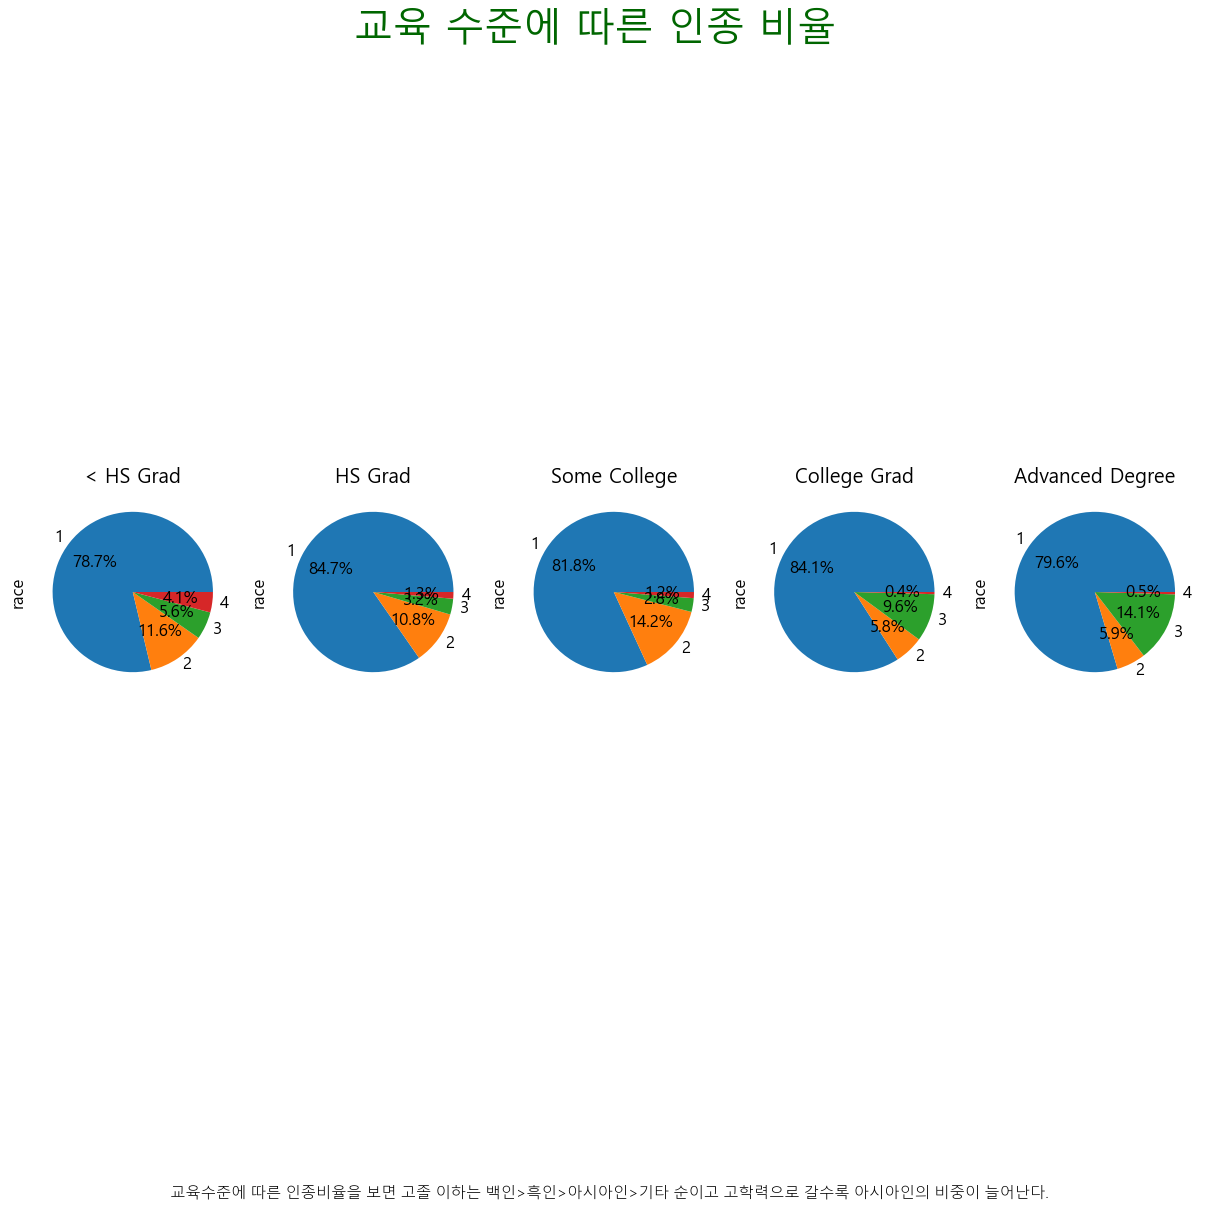

In [ ]:
fig,(bx1,bx2,bx3,bx4,bx5) = plt.subplots(1,5,figsize=(15,12))


fig.suptitle('교육 수준에 따른 인종 비율', fontsize=28, color='#006600')
r1_df2['race'].plot.pie(ax=bx1,autopct='%0.1f%%')
r2_df2['race'].plot.pie(ax=bx2,autopct='%0.1f%%')
r3_df2['race'].plot.pie(ax=bx3,autopct='%0.1f%%')
r4_df2['race'].plot.pie(ax=bx4,autopct='%0.1f%%')
r5_df2['race'].plot.pie(ax=bx5,autopct='%0.1f%%')

bx1.set_title('< HS Grad')
bx2.set_title('HS Grad')
bx3.set_title('Some College')
bx4.set_title('College Grad')
bx5.set_title('Advanced Degree')


txt = """ 교육수준에 따른 인종비율을 보면 고졸 이하는 백인>흑인>아시아인>기타 순이고 고학력으로 갈수록 아시아인의 비중이 늘어난다. """
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 11, "weight": "light"})
plt.show()
plt.close()

